In [57]:
import os
import re
import sklearn
import numpy as np 
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from collections import Counter
from sklearn.metrics import *
from sklearn.linear_model import *
from sklearn.model_selection import *

pd.set_option('display.max_columns', None)

full_path = []
for dirname, _, filenames in os.walk('C:/Users/E083660/OneDrive - RSM/Kaggle'):
    for filename in filenames:
        full_path.append(os.path.join(dirname,filename))
        print(os.path.join(dirname, filename))

C:/Users/E083660/OneDrive - RSM/Kaggle\Chris_xgboost test.xlsx
C:/Users/E083660/OneDrive - RSM/Kaggle\Cities.csv
C:/Users/E083660/OneDrive - RSM/Kaggle\Conferences.csv
C:/Users/E083660/OneDrive - RSM/Kaggle\MConferenceTourneyGames.csv
C:/Users/E083660/OneDrive - RSM/Kaggle\MGameCities.csv
C:/Users/E083660/OneDrive - RSM/Kaggle\MMasseyOrdinals.csv
C:/Users/E083660/OneDrive - RSM/Kaggle\MNCAATourneyCompactResults.csv
C:/Users/E083660/OneDrive - RSM/Kaggle\MNCAATourneyDetailedResults.csv
C:/Users/E083660/OneDrive - RSM/Kaggle\MNCAATourneySeedRoundSlots.csv
C:/Users/E083660/OneDrive - RSM/Kaggle\MNCAATourneySeeds.csv
C:/Users/E083660/OneDrive - RSM/Kaggle\MNCAATourneySlots.csv
C:/Users/E083660/OneDrive - RSM/Kaggle\MRegularSeasonCompactResults.csv
C:/Users/E083660/OneDrive - RSM/Kaggle\MRegularSeasonDetailedResults.csv
C:/Users/E083660/OneDrive - RSM/Kaggle\MSeasons.csv
C:/Users/E083660/OneDrive - RSM/Kaggle\MSecondaryTourneyCompactResults.csv
C:/Users/E083660/OneDrive - RSM/Kaggle\MSecond

In [63]:
dirname = "C:/Users/E083660/OneDrive - RSM/Kaggle"

df_season_results = pd.concat([
    pd.read_csv(dirname + "/MRegularSeasonDetailedResults.csv"),
    pd.read_csv(dirname + "/WRegularSeasonDetailedResults.csv"),
], ignore_index=True)

df_season_results.drop(['NumOT', 'WLoc'], axis=1, inplace=True)
df = pd.read_csv(dirname+'/SampleSubmission2023.csv')

In [64]:
df_season_results

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,10,1104,68,1328,62,27,58,3,14,11,18,14,24,13,23,7,1,22,22,53,2,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,26,62,8,20,10,19,15,28,16,13,4,4,18,24,67,6,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,24,58,8,18,17,29,17,26,15,10,5,2,25,22,73,3,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,18,38,3,9,17,31,6,19,11,12,14,2,18,18,49,6,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,30,61,6,14,11,13,17,22,12,14,4,4,20,24,62,6,16,17,27,21,15,12,10,7,1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176836,2023,113,3268,96,3234,68,34,71,14,26,14,15,11,23,19,11,15,1,14,23,66,11,38,11,15,18,19,14,24,5,3,14
176837,2023,113,3385,69,3163,64,23,63,9,18,14,18,12,26,14,12,4,6,18,22,62,8,21,12,15,11,25,14,12,5,7,19
176838,2023,113,3416,57,3396,53,19,60,4,17,15,27,13,32,9,17,3,7,14,16,70,7,26,14,17,16,19,5,9,10,9,20
176839,2023,113,3437,67,3177,64,24,67,8,23,11,15,10,31,19,14,7,9,10,26,77,4,19,8,11,21,26,13,12,9,2,14


# Exploratory Data Analysis

### 3 Pointers

In [65]:
All_SeasonResults = df_season_results

In [66]:
W3 = All_SeasonResults.groupby(['Season','WTeamID'])[['WFGM3','WFGA3']].sum().reset_index()[['Season','WTeamID','WFGM3','WFGA3']]
W3['WFGM3%'] = W3['WFGM3'] / W3['WFGA3']

In [67]:
L3 = All_SeasonResults.groupby(['Season','LTeamID'])[['LFGM3','LFGA3']].sum().reset_index()[['Season','LTeamID','LFGM3','LFGA3']]
L3['LFGM3%'] = L3['LFGM3'] / L3['LFGA3']

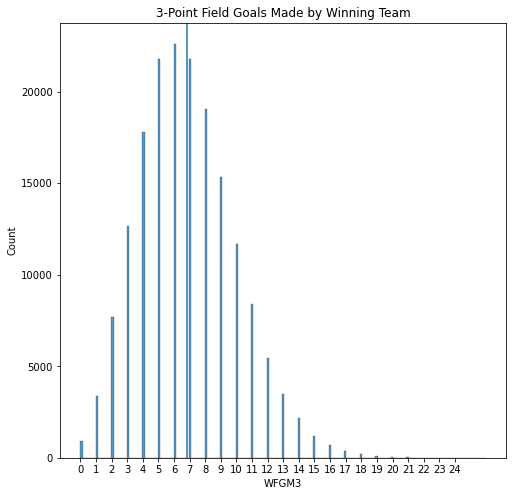

In [68]:
plt.figure(figsize=(8,8))
plt.xticks(ticks =np.arange(0,25,1), labels=np.arange(0,25,1))
mean = np.mean(df_season_results['WFGM3'])
sb.histplot(df_season_results['WFGM3'])
plt.axvline(mean)
plt.xticks(ticks =np.arange(0,25,1), labels=np.arange(0,25,1))
plt.title("3-Point Field Goals Made by Winning Team");

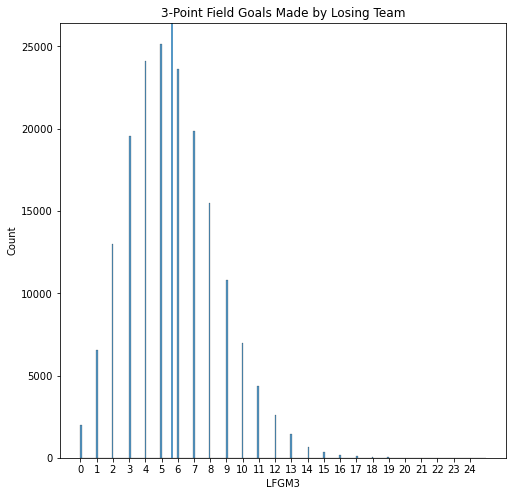

In [69]:
plt.figure(figsize=(8,8))
mean = np.mean(df_season_results['LFGM3'])
sb.histplot(df_season_results['LFGM3'])
plt.axvline(mean)
plt.xticks(ticks =np.arange(0,25,1), labels=np.arange(0,25,1))
plt.title("3-Point Field Goals Made by Losing Team");

#### Calculate % of 3pt made in 2023 season

<Figure size 432x288 with 0 Axes>

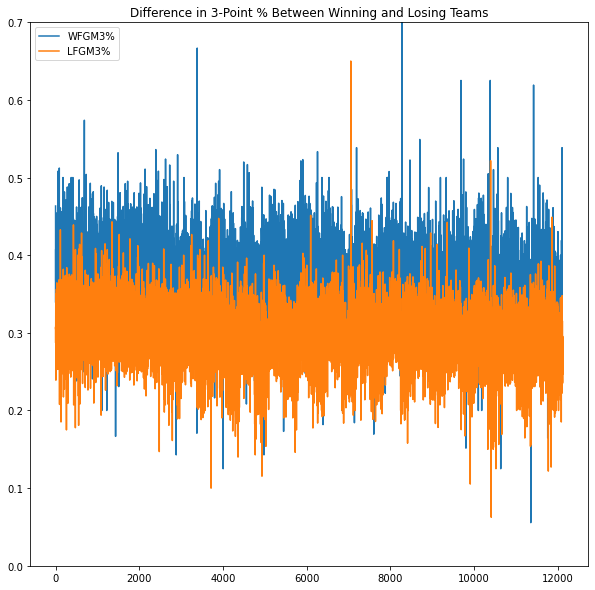

In [70]:
fig = plt.figure()
plt.figure(figsize=(10,10))
for frame in [W3,L3]:
    plt.plot(frame.index, frame.iloc[:,-1], label=frame.columns[-1])

plt.ylim(0,.7)
plt.title("Difference in 3-Point % Between Winning and Losing Teams")
plt.legend(loc='upper left')
plt.show()

(0.02083333333333333, 0.7847222222222222)

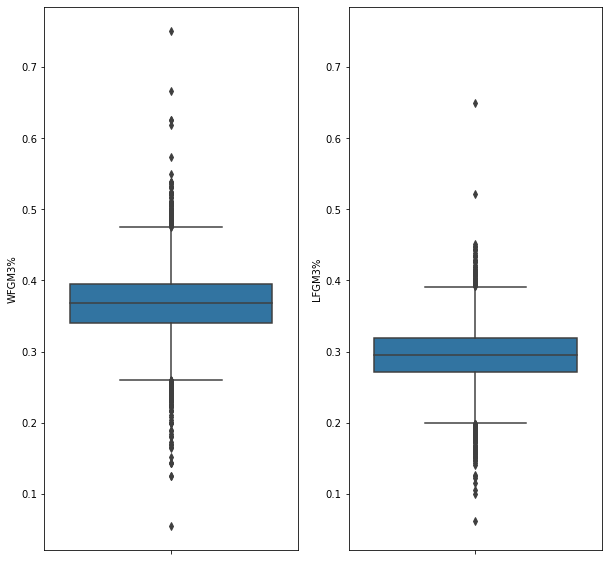

In [72]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
sb.boxplot(data=W3, y='WFGM3%')
ymin, ymax = plt.gca().get_ylim()
plt.subplot(1,2,2)
sb.boxplot(data=L3, y='LFGM3%')
plt.ylim([ymin, ymax])

## Feature Engineering

#### Overall Team 3-Point Shooting %'s

In [73]:
all3 = W3
all3['WFGM3'] = all3['WFGM3'] + L3['LFGM3']
all3['WFGA3'] = all3['WFGA3'] + L3['LFGA3']
all3.rename(columns={'WTeamID':'TeamID','WFGM3':'FGM3', 'WFGA3':'FGA3'}, inplace =True)
all3['FG3%'] = all3['FGM3']/all3['FGA3']

In [74]:
all3.sort_values(by='FG3%',ascending=False)

,Season,TeamID,FGM3,FGA3,WFGM3%,FG3%
3899,2012,1296,46.0,98.0,0.480000,0.469388
1504,2007,1309,160.0,361.0,0.479638,0.443213
115,2003,1229,188.0,427.0,0.460870,0.440281
3900,2012,1298,147.0,338.0,0.428571,0.434911
350,2004,1128,218.0,503.0,0.475219,0.433400
...,...,...,...,...,...,...
8372,2018,3244,54.0,249.0,0.224138,0.216867
4310,2012,3369,65.0,304.0,0.282353,0.213816
5026,2013,3394,16.0,75.0,0.244898,0.213333
4289,2012,3348,24.0,118.0,0.333333,0.203390


In [224]:
all3[['Season','TeamID']] = all3[['Season','TeamID']].astype(str)

#### Overall Team Shooting %'s

In [75]:
WFG = All_SeasonResults.groupby(['Season','WTeamID'])[['WFGM','WFGA']].sum().reset_index()[['Season','WTeamID','WFGM','WFGA']]
LFG = All_SeasonResults.groupby(['Season', 'LTeamID'])[['LFGM','LFGA']].sum().reset_index()[['Season','LTeamID','LFGM','LFGA']]
    
allFG = WFG
allFG['WFGM'] = allFG['WFGM'] + LFG['LFGM']
allFG['WFGA'] = allFG['WFGA'] + LFG['LFGA']
allFG.rename(columns={'WTeamID':'TeamID','WFGM':'FGM', 'WFGA':'FGA'}, inplace =True)
allFG['FG%'] = allFG['FGM']/allFG['FGA']


In [76]:
allFG.sort_values(by='FG%',ascending=False)

,Season,TeamID,FGM,FGA,FG%
949,2005,1429,781.0,1466.0,0.532742
10917,2022,1355,1033.0,2002.0,0.515984
8915,2019,1441,251.0,487.0,0.515400
427,2004,1211,842.0,1635.0,0.514985
10091,2021,1211,1103.0,2147.0,0.513740
...,...,...,...,...,...
8361,2018,3233,456.0,1420.0,0.321127
5074,2013,3447,387.0,1213.0,0.319044
2717,2010,3137,413.0,1308.0,0.315749
7597,2017,3168,413.0,1331.0,0.310293


In [188]:
allFG[['Season','TeamID']] = allFG[['Season','TeamID']].astype(str)

#### Win Ratio

In [77]:
num_win = All_SeasonResults.groupby(['Season','WTeamID']).count().reset_index()[['Season','WTeamID','DayNum']].rename(columns={'WTeamID':'TeamID','DayNum':'NumWins'})
num_loss = All_SeasonResults.groupby(['Season','LTeamID']).count().reset_index()[['Season','LTeamID','DayNum']].rename(columns={'LTeamID':'TeamID','DayNum':'NumLosses'})

In [105]:
win_ratio = num_win
win_ratio['NumLosses'] = num_loss['NumLosses']
win_ratio['WinRatio'] = win_ratio['NumWins'] /(win_ratio['NumWins'] + win_ratio['NumLosses'])
win_ratio.sort_values(by='Season',ascending=True)

,Season,TeamID,NumWins,NumLosses,WinRatio
0,2003,1102,12,16,0.428571
222,2003,1351,12,16,0.428571
221,2003,1350,15,13,0.535714
220,2003,1349,17,10,0.629630
219,2003,1348,18,11,0.620690
...,...,...,...,...,...
11627,2023,1353,17,16,0.515152
11628,2023,1354,4,16,0.200000
11629,2023,1355,16,17,0.484848
11631,2023,1357,13,8,0.619048


In [79]:
win_ratio[['Season','TeamID']] = win_ratio[['Season','TeamID']].astype(str) 

#### Gap Win / Gap Loss

In [80]:
ScoreDf = All_SeasonResults[['Season','DayNum','WTeamID','WScore','LTeamID','LScore']]
ScoreDf['ScoreGap'] = ScoreDf['WScore'] - ScoreDf['LScore']

C:\Users\E083660\AppData\Local\Temp\ipykernel_10568\1916584998.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ScoreDf['ScoreGap'] = ScoreDf['WScore'] - ScoreDf['LScore']


In [81]:
gap_win = ScoreDf.groupby(['Season', 'WTeamID']).mean().reset_index()
gap_win = gap_win[['Season', 'WTeamID', 'ScoreGap']].rename(columns={"ScoreGap": "GapWins", "WTeamID": "TeamID"})
gap_loss = ScoreDf.groupby(['Season', 'LTeamID']).mean().reset_index()
gap_loss = gap_loss[['Season', 'LTeamID', 'ScoreGap']].rename(columns={"ScoreGap": "GapLosses", "LTeamID": "TeamID"})

In [82]:
gap_win[['Season','TeamID']] = gap_win[['Season','TeamID']].astype(str)

In [83]:
gap_loss[['Season','TeamID']] = gap_loss[['Season','TeamID']].astype(str)

## Training DataFrame

In [195]:
df_tourney_results = pd.concat([
    pd.read_csv(dirname + "/WNCAATourneyCompactResults.csv"),
    pd.read_csv(dirname + "/MNCAATourneyCompactResults.csv"),
], ignore_index=True)
df_tourney_results.drop(['NumOT', 'WLoc'], axis=1, inplace=True)

In [172]:
df_tourney_results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3900 entries, 0 to 3899
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Season      3900 non-null   object 
 1   DayNum      3900 non-null   int64  
 2   WTeamID     3900 non-null   object 
 3   WScore      3900 non-null   int64  
 4   LTeamID     3900 non-null   object 
 5   LScore      3900 non-null   int64  
 6   NumWinsW    2008 non-null   float64
 7   NumLossesW  2008 non-null   float64
 8   WinRatioW   2008 non-null   float64
 9   NumWinsL    2008 non-null   float64
 10  NumLossesL  2008 non-null   float64
 11  WinRatioL   2008 non-null   float64
 12  GapWinsW    2008 non-null   float64
 13  GapWinsL    2008 non-null   float64
 14  GapLossesW  1960 non-null   float64
 15  GapLossesL  2001 non-null   float64
dtypes: float64(10), int64(3), object(3)
memory usage: 518.0+ KB


In [196]:
df_tourney_results[['Season','WTeamID','LTeamID']] = df_tourney_results[['Season','WTeamID','LTeamID']].astype(str)

#### Add all of the features to the training dataframe

In [197]:
df_tourney_results = pd.merge(df_tourney_results, win_ratio, how='left',
        left_on=['Season','WTeamID'],
        right_on=['Season','TeamID']).drop(['TeamID'],axis=1).rename(columns={'WinRatio':'WinRatioW','NumWins':'NumWinsW','NumLosses':'NumLossesW'})

In [198]:
df_tourney_results = pd.merge(df_tourney_results, win_ratio,how='left',
        left_on=['Season','LTeamID'],
        right_on=['Season','TeamID']).drop(['TeamID'], axis=1).rename(columns={'WinRatio':'WinRatioL','NumWins':'NumWinsL','NumLosses':'NumLossesL'})

In [199]:
df_tourney_results = pd.merge(df_tourney_results, gap_win,how='left',
        left_on=['Season','WTeamID'],
        right_on=['Season','TeamID']).drop(['TeamID'], axis=1).rename(columns={'GapWins':'GapWinsW'})

In [200]:
df_tourney_results = pd.merge(df_tourney_results, gap_win,how='left',
        left_on=['Season','LTeamID'],
        right_on=['Season','TeamID']).drop(['TeamID'], axis=1).rename(columns={'GapWins':'GapWinsL'})

In [201]:
df_tourney_results = pd.merge(df_tourney_results, gap_loss,how='left',
        left_on=['Season','WTeamID'],
        right_on=['Season','TeamID']).drop(['TeamID'], axis=1).rename(columns={'GapLosses':'GapLossesW'})

In [202]:
df_tourney_results = pd.merge(df_tourney_results, gap_loss,how='left',
        left_on=['Season','LTeamID'],
        right_on=['Season','TeamID']).drop(['TeamID'], axis=1).rename(columns={'GapLosses':'GapLossesL'})

In [203]:
df_tourney_results = pd.merge(df_tourney_results, allFG, how='left',
        left_on=['Season','WTeamID'],
        right_on=['Season','TeamID']).drop(['TeamID','FGM','FGA'], axis=1).rename(columns={'FG%':'FG%W'})

In [221]:
df_tourney_results = pd.merge(df_tourney_results, allFG, how='left',
        left_on=['Season','LTeamID'],
        right_on=['Season','TeamID']).drop(['TeamID','FGM','FGA'], axis=1).rename(columns={'FG%':'FG%L'})

In [227]:
df_tourney_results = pd.merge(df_tourney_results, all3,how='left',
        left_on=['Season','WTeamID'],
        right_on=['Season','TeamID']).drop(['TeamID','FGM3','FGA3','WFGM3%'],axis=1).rename(columns={'FG3%':'FG3%W'})

In [229]:
df_tourney_results = pd.merge(df_tourney_results, all3,how='left',
        left_on=['Season','LTeamID'],
        right_on=['Season','TeamID']).drop(['TeamID','FGM3','FGA3','WFGM3%'],axis=1).rename(columns={'FG3%':'FG3%L'})

#### Compute Gap Avg

In [204]:
### Compute the GapAvgA

df_tourney_results['GapAvgW'] = (
                (df_tourney_results['NumWinsW'] * df_tourney_results['GapWinsW'] -
                df_tourney_results['NumLossesW'] * df_tourney_results['GapLossesW']) /
                (df_tourney_results['NumWinsW'] + df_tourney_results['NumLossesW']))

In [205]:
### Compute the GapAvgB

df_tourney_results['GapAvgL'] = (
                (df_tourney_results['NumWinsL'] * df_tourney_results['GapWinsL'] -
                df_tourney_results['NumLossesL'] * df_tourney_results['GapLossesL']) /
                (df_tourney_results['NumWinsL'] + df_tourney_results['NumLossesL']))

In [232]:
df_tourney_results.drop(columns=['NumWinsW','NumLossesW','NumWinsL','NumLossesL','GapWinsW','GapWinsL','GapLossesW','GapLossesL'], inplace=True)

In [233]:
df_tourney_results['Season'] = df_tourney_results['Season'].astype(int)

In [235]:
df_train = df_tourney_results[(df_tourney_results['Season']>2009)]

#### Add losses to training dataframe

In [245]:
def add_loosing_matches(df):
    win_rename = {
        "WTeamID": "TeamIdA", 
        "WScore" : "ScoreA", 
        "LTeamID" : "TeamIdB",
        "LScore": "ScoreB",
     }
    win_rename.update({c : c[:-1] + "A" for c in df.columns if c.endswith('W')})
    win_rename.update({c : c[:-1] + "B" for c in df.columns if c.endswith('L')})
    
    lose_rename = {
        "WTeamID": "TeamIdB", 
        "WScore" : "ScoreB", 
        "LTeamID" : "TeamIdA",
        "LScore": "ScoreA",
    }
    lose_rename.update({c : c[:-1] + "B" for c in df.columns if c.endswith('W')})
    lose_rename.update({c : c[:-1] + "A" for c in df.columns if c.endswith('L')})
    
    win_df = df.copy()
    lose_df = df.copy()
    
    win_df = win_df.rename(columns=win_rename)
    lose_df = lose_df.rename(columns=lose_rename)
    
    return pd.concat([win_df, lose_df], axis=0, sort=False)

In [247]:
df_train = add_loosing_matches(df_train)

In [250]:
df_train['ScoreDiff'] = df_train['ScoreA'] - df_train['ScoreB']
df_train['WinA'] = (df_train['ScoreDiff'] > 0).astype(int)

#### Calculate diffs between team A and team B

In [253]:
cols_to_diff = [
    'FG%', 'FG3%', 'WinRatio', 'GapAvg',
]

for col in cols_to_diff:
    df_train[col + 'Diff'] = df_train[col + 'A'] - df_train[col + 'B']

#### 1st Pass LR

In [281]:
df_train.dropna(inplace=True)

In [283]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

cols=['WinRatioA', 'WinRatioB', 'FG%A', 'GapAvgA', 'GapAvgB', 'FG%B', 'FG3%A',
       'FG3%B', 'FG%Diff', 'FG3%Diff', 'WinRatioDiff',
       'GapAvgDiff']
X =df_train[cols]
y =df_train['WinA']

model= LogisticRegression()

rfe = RFE(model, n_features_to_select=10)
rfe = rfe.fit(X, y)

print('Selected features: %s' % list(X.columns[rfe.support_]))

Selected features: ['WinRatioA', 'WinRatioB', 'FG%A', 'FG%B', 'FG3%A', 'FG3%B', 'FG%Diff', 'FG3%Diff', 'WinRatioDiff', 'GapAvgDiff']


Train/Test split results:
LogisticRegression accuracy is 0.662
LogisticRegression log_loss is 0.608
LogisticRegression auc is 0.725


C:\Users\E083660\AppData\Local\Temp\ipykernel_10568\3898038552.py:31: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
C:\Users\E083660\AppData\Local\Temp\ipykernel_10568\3898038552.py:32: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')


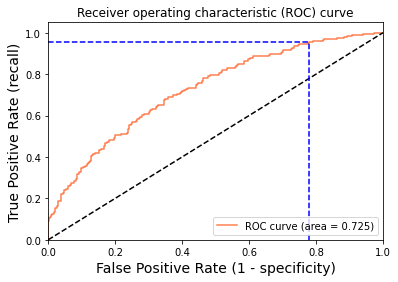

Using a threshold of 0.278 guarantees a sensitivity of 0.955 and a specificity of 0.221, i.e. a false positive rate of 77.88%.


In [284]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

Selected_features = ['WinRatioA', 'WinRatioB', 'FG%A', 'FG%B', 'FG3%A', 'FG3%B', 'FG%Diff', 'FG3%Diff', 'WinRatioDiff', 'GapAvgDiff']

X= df_train[Selected_features]
y= df_train['WinA']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)



# check classification scores of logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

## Building Test DataFrame

#### Merge to Test DataFrame

In [86]:
df[['Season','TeamIdA','TeamIdB']]= df['ID'].str.split('_',expand=True)

In [87]:
df_test = df.copy()

In [88]:
### adding the average difference between scores that team has when they win

df_test = pd.merge(df_test, gap_win, how='left',
         left_on=['Season','TeamIdA'],
        right_on=['Season','TeamID']).drop('TeamID',axis=1).rename(columns={'GapWins':'GapWinsA'})


In [89]:
### now the same for team B

df_test = pd.merge(df_test, gap_win, how='left',
                  left_on=['Season','TeamIdB'],
                  right_on=['Season','TeamID']).drop('TeamID', axis=1).rename(columns={'GapWins':'GapWinsB'})

In [90]:
### adding the average difference between scores that team has when they lose

df_test = pd.merge(df_test,gap_loss, how='left',
        left_on=['Season','TeamIdA'],
        right_on=['Season','TeamID']).drop('TeamID',axis=1).rename(columns={'GapLosses':'GapLossA'})

In [91]:
### Same for team B

df_test = pd.merge(df_test,gap_loss, how='left',
        left_on=['Season','TeamIdB'],
        right_on=['Season','TeamID']).drop('TeamID',axis=1).rename(columns={'GapLosses':'GapLossB'})

In [92]:
### Merge numwins numlosses and win ratio

df_test = pd.merge(df_test,win_ratio, how='left',
        left_on=['Season','TeamIdA'],
        right_on=['Season','TeamID']).drop('TeamID',axis=1).rename(columns={'NumWins':'NumWinsA','NumLosses':'NumLossesA','WinRatio':'WinRatioA'})

In [93]:
### Merge same as block before but for B

df_test = pd.merge(df_test,win_ratio, how='left',
        left_on=['Season','TeamIdB'],
        right_on=['Season','TeamID']).drop('TeamID',axis=1).rename(columns={'NumWins':'NumWinsB','NumLosses':'NumLossesB','WinRatio':'WinRatioB'})

In [94]:
### Compute the GapAvgA

df_test['GapAvgA'] = (
                (df_test['NumWinsA'] * df_test['GapWinsA'] -
                df_test['NumLossesA'] * df_test['GapLossA']) /
                (df_test['NumWinsA'] + df_test['NumLossesA']))

In [95]:
### Compute the GapAvgB

df_test['GapAvgB'] = (
                (df_test['NumWinsB'] * df_test['GapWinsB'] -
                df_test['NumLossesB'] * df_test['GapLossB']) /
                (df_test['NumWinsB'] + df_test['NumLossesB']))

In [97]:
df_test

,ID,Pred,Season,TeamIdA,TeamIdB,GapWinsA,GapWinsB,GapLossA,GapLossB,NumWinsA,NumLossesA,WinRatioA,NumWinsB,NumLossesB,WinRatioB,GapAvgA,GapAvgB
0,2023_1101_1102,0.5,2023,1101,1102,11.333333,12.642857,12.692308,11.333333,9.0,13.0,0.409091,14.0,19.0,0.424242,-2.863636,-1.161616
1,2023_1101_1103,0.5,2023,1101,1103,11.333333,15.411765,12.692308,12.777778,9.0,13.0,0.409091,17.0,12.0,0.586207,-2.863636,3.747126
2,2023_1101_1104,0.5,2023,1101,1104,11.333333,20.260870,12.692308,14.500000,9.0,13.0,0.409091,23.0,21.0,0.522727,-2.863636,3.670455
3,2023_1101_1105,0.5,2023,1101,1105,11.333333,10.111111,12.692308,11.250000,9.0,13.0,0.409091,9.0,11.0,0.450000,-2.863636,-1.637500
4,2023_1101_1106,0.5,2023,1101,1106,11.333333,7.285714,12.692308,15.650000,9.0,13.0,0.409091,7.0,6.0,0.538462,-2.863636,-3.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130678,2023_3474_3476,0.5,2023,3474,3476,10.200000,10.571429,19.888889,13.368421,5.0,8.0,0.384615,7.0,9.0,0.437500,-8.316239,-2.894737
130679,2023_3474_3477,0.5,2023,3474,3477,10.200000,11.000000,19.888889,16.733333,5.0,8.0,0.384615,11.0,20.0,0.354839,-8.316239,-6.892473
130680,2023_3475_3476,0.5,2023,3475,3476,13.875000,10.571429,11.625000,13.368421,8.0,23.0,0.258065,7.0,9.0,0.437500,-5.044355,-2.894737
130681,2023_3475_3477,0.5,2023,3475,3477,13.875000,11.000000,11.625000,16.733333,8.0,23.0,0.258065,11.0,20.0,0.354839,-5.044355,-6.892473
